<a href="https://colab.research.google.com/github/azerrr18/python-projects-for-data-analysis/blob/main/imtahan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [ ]:
# Import pandas library
import pandas as pd

# Load the dataset

df = pd.read_csv('ecommerce_orders_2025_utf8.csv')

# Print the shape (rows, columns)
print('Shape:', df.shape)

# Display first 8 rows
df.head(8)

Shape: (1000, 8)


,OrderID,CustomerID,OrderDate,Product,Category,Quantity,Price,Country
0,ORD00001,CUST1173,2025-11-24 00:00:00,USB Hub,Electronics,6,115.49,Turkey
1,ORD00002,CUST1129,2025-10-07 00:00:00,Jump Rope,Sports,-2,19.75,Turkey
2,ORD00003,CUST1114,2025-11-05 00:00:00,Water Bottle,Sports,19,352.16,Azerbaijan
3,ORD00004,CUST1039,2025-10-29 00:00:00,Lego Set,Toys,4,350.58,United Kingdom
4,ORD00005,CUST1154,2025-04-21 00:00:00,Wireless Earbuds,Electronics,11,52.87,UAE
5,ORD00006,CUST1020,2025-05-16 00:00:00,Perfume,Beauty,16,66.79,Azerbaijan
6,ORD00007,CUST1011,2025-10-10 00:00:00,Board Game,Toys,10,290.79,United Kingdom
7,ORD00008,CUST1097,2025-12-05 00:00:00,Doll,Toys,1,428.38,France


In [ ]:
#2ci sual
#Column names and data types
df.info()
#Number of missing values per column
df.isna().sum()
#Summary statistics for Quantity and Price
df[['Quantity','Price']]
#Number of unique values in Country and Category column
df['Country'].nunique()
df['Category'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     1000 non-null   object 
 1   CustomerID  926 non-null    object 
 2   OrderDate   1000 non-null   object 
 3   Product     1000 non-null   object 
 4   Category    1000 non-null   object 
 5   Quantity    1000 non-null   int64  
 6   Price       1000 non-null   float64
 7   Country     1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


7

In [ ]:
#3cu sual
#Find which column(s) have missing values and what percentage they make up
df.isnull().mean()*100

,0
OrderID,0.0
CustomerID,7.4
OrderDate,0.0
Product,0.0
Category,0.0
Quantity,0.0
Price,0.0
Country,0.0


In [ ]:
#replace the missing values with 'guest'
df['CustomerID'] = df['CustomerID'].fillna('Guest')

In [ ]:
#4cu sual
#create new date columns
from datetime import datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month
df['MonthName'] = df['OrderDate'].dt.month_name()
df['Quarter'] = df['OrderDate'].dt.quarter
df

,OrderID,CustomerID,OrderDate,Product,Category,Quantity,Price,Country,Year,Month,MonthName,Quarter
0,ORD00001,CUST1173,2025-11-24,USB Hub,Electronics,6,115.49,Turkey,2025,11,November,4
1,ORD00002,CUST1129,2025-10-07,Jump Rope,Sports,-2,19.75,Turkey,2025,10,October,4
2,ORD00003,CUST1114,2025-11-05,Water Bottle,Sports,19,352.16,Azerbaijan,2025,11,November,4
3,ORD00004,CUST1039,2025-10-29,Lego Set,Toys,4,350.58,United Kingdom,2025,10,October,4
4,ORD00005,CUST1154,2025-04-21,Wireless Earbuds,Electronics,11,52.87,UAE,2025,4,April,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,ORD00996,CUST1072,2025-05-15,Jump Rope,Sports,18,339.86,Georgia,2025,5,May,2
996,ORD00997,CUST1189,2025-06-14,Charger,Electronics,-2,68.46,Azerbaijan,2025,6,June,2
997,ORD00998,CUST1091,2025-10-26,Doll,Toys,11,53.19,Azerbaijan,2025,10,October,4
998,ORD00999,CUST1021,2025-07-30,Smart Watch,Electronics,6,121.14,UAE,2025,7,July,3


In [ ]:
#5ci sual
#removing the values less than zero
df = df.loc[(df['Quantity'] > 0) & (df['Price'] > 0)]
#creating now column
df['Revenue'] = df['Quantity'] * df['Price']
df

,OrderID,CustomerID,OrderDate,Product,Category,Quantity,Price,Country,Year,Month,MonthName,Quarter,Revenue
0,ORD00001,CUST1173,2025-11-24,USB Hub,Electronics,6,115.49,Turkey,2025,11,November,4,692.94
2,ORD00003,CUST1114,2025-11-05,Water Bottle,Sports,19,352.16,Azerbaijan,2025,11,November,4,6691.04
3,ORD00004,CUST1039,2025-10-29,Lego Set,Toys,4,350.58,United Kingdom,2025,10,October,4,1402.32
4,ORD00005,CUST1154,2025-04-21,Wireless Earbuds,Electronics,11,52.87,UAE,2025,4,April,2,581.57
5,ORD00006,CUST1020,2025-05-16,Perfume,Beauty,16,66.79,Azerbaijan,2025,5,May,2,1068.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,ORD00995,CUST1100,2025-10-04,Towel Set,Home & Kitchen,16,427.90,Italy,2025,10,October,4,6846.40
995,ORD00996,CUST1072,2025-05-15,Jump Rope,Sports,18,339.86,Georgia,2025,5,May,2,6117.48
997,ORD00998,CUST1091,2025-10-26,Doll,Toys,11,53.19,Azerbaijan,2025,10,October,4,585.09
998,ORD00999,CUST1021,2025-07-30,Smart Watch,Electronics,6,121.14,UAE,2025,7,July,3,726.84


In [ ]:
#6ci sual
#Finding how many orders done in 4th quartile
df['Quartile'] = pd.qcut(df['Quantity'], q=4, labels=False)
df['orders_in_4th_quartile_count'] = df[df['Quartile'] == 3].shape[0]
print(f"Number of orders in the 4th quartile: {orders_in_4th_quartile_count}")

NameError: name 'orders_in_4th_quartile_count' is not defined

In [ ]:
#filtering the data
df_filtered = df[((df['Category'] == 'Sports') | (df['Category'] == 'Beauty')) & (df['Revenue'] > 500)]
df_filtered

,OrderID,CustomerID,OrderDate,Product,Category,Quantity,Price,Country,Year,Month,MonthName,Quarter,Revenue,Quartile,orders_in_4th_quartile_count
2,ORD00003,CUST1114,2025-11-05,Water Bottle,Sports,19,352.16,Azerbaijan,2025,11,November,4,6691.04,3,185
5,ORD00006,CUST1020,2025-05-16,Perfume,Beauty,16,66.79,Azerbaijan,2025,5,May,2,1068.64,3,185
8,ORD00009,CUST1068,2025-05-23,Lipstick,Beauty,4,188.24,Georgia,2025,5,May,2,752.96,0,185
9,ORD00010,CUST1097,2025-12-26,Water Bottle,Sports,16,365.92,Turkey,2025,12,December,4,5854.72,3,185
12,ORD00013,CUST1036,2025-06-11,Perfume,Beauty,11,442.92,France,2025,6,June,2,4872.12,2,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,ORD00978,CUST1031,2025-08-06,Water Bottle,Sports,12,60.86,France,2025,8,August,3,730.32,2,185
978,ORD00979,CUST1142,2025-08-27,Water Bottle,Sports,14,382.33,Turkey,2025,8,August,3,5352.62,2,185
990,ORD00991,CUST1008,2025-09-16,Resistance Band,Sports,16,275.58,United Kingdom,2025,9,September,3,4409.28,3,185
992,ORD00993,CUST1183,2025-01-17,Resistance Band,Sports,4,248.28,Germany,2025,1,January,1,993.12,0,185


In [ ]:
#finding how many orders did countries in 4 quartiles
df_4th_quartile = df[df['Quartile'] == 3][['OrderID', 'Country', 'Quartile']]
df_4th_quartile

,OrderID,Country,Quartile
2,ORD00003,Azerbaijan,3
5,ORD00006,Azerbaijan,3
9,ORD00010,Turkey,3
13,ORD00014,Germany,3
15,ORD00016,Germany,3
...,...,...,...
970,ORD00971,Azerbaijan,3
990,ORD00991,United Kingdom,3
993,ORD00994,Georgia,3
994,ORD00995,Italy,3


In [ ]:
#7ci sual
#finding the total revenue, quantities,unique customers and average price
total_revenue = df['Revenue'].sum().round(2)
total_quantity = df['Quantity'].sum().round(2)
unique_customers = df['CustomerID'].nunique
average_price = df['Price'].mean().round(2)
print(f'Total Revenue: {total_revenue}')
print(f'Total Quantity: {total_quantity}')
print(f'Average Price: {average_price}')

Total Revenue: 2291486.98
Total Quantity: 8836
Average Price: 253.91


In [ ]:
#displaying the tottal revenue ascending
df_total_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
df_total_revenue

,Revenue
Country,
Kazakhstan,303977.64
Turkey,273019.65
Azerbaijan,239844.83
UAE,227161.30
Italy,226651.80
France,222939.01
Russia,218196.43
Georgia,213350.41
United Kingdom,197510.44


Text(0.5, 1.0, 'Total Revenue by Country')

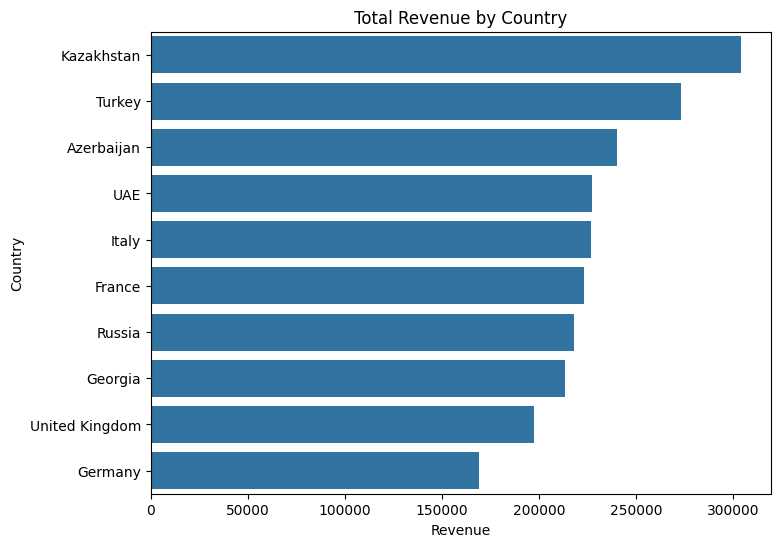

In [ ]:
#8ci sual
#Horizontal bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=df_total_revenue.values, y=df_total_revenue.index)
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.title('Total Revenue by Country')

Text(0.5, 1.0, 'Monthly Revenue')

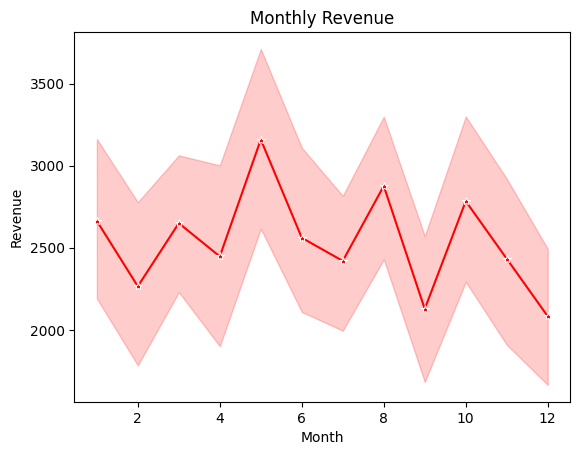

In [ ]:
#Line Chart
sns.lineplot(x=df['Month'],y=df['Revenue'],marker='*',color='red')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')


In [ ]:
#9cu sual
region_info = {
    'Country':    ['Azerbaijan', 'Turkey', 'Germany', 'France', 'United Kingdom',
                   'UAE', 'Russia', 'Georgia', 'Kazakhstan', 'Italy'],
    'Region':     ['Caucasus', 'Middle East', 'Europe', 'Europe', 'Europe',
                   'Middle East', 'CIS', 'Caucasus', 'CIS', 'Europe'],
    'MarketTier': ['Emerging', 'Emerging', 'Mature', 'Mature', 'Mature',
                   'Emerging', 'Emerging', 'Emerging', 'Emerging', 'Mature']
}

In [ ]:
#creating new Dataframe
df_region = pd.DataFrame(region_info)
df_region

,Country,Region,MarketTier
0,Azerbaijan,Caucasus,Emerging
1,Turkey,Middle East,Emerging
2,Germany,Europe,Mature
3,France,Europe,Mature
4,United Kingdom,Europe,Mature
5,UAE,Middle East,Emerging
6,Russia,CIS,Emerging
7,Georgia,Caucasus,Emerging
8,Kazakhstan,CIS,Emerging
9,Italy,Europe,Mature


In [ ]:
#merging 2 dataframes
region = pd.merge(df, df_region, on='Country')
region.drop('orders_in_4th_quartile_count',axis =1)
region.head(5)


,OrderID,CustomerID,OrderDate,Product,Category,Quantity,Price,Country,Year,Month,MonthName,Quarter,Revenue,Quartile,orders_in_4th_quartile_count,Region,MarketTier
0,ORD00001,CUST1173,2025-11-24,USB Hub,Electronics,6,115.49,Turkey,2025,11,November,4,692.94,1,185,Middle East,Emerging
1,ORD00003,CUST1114,2025-11-05,Water Bottle,Sports,19,352.16,Azerbaijan,2025,11,November,4,6691.04,3,185,Caucasus,Emerging
2,ORD00004,CUST1039,2025-10-29,Lego Set,Toys,4,350.58,United Kingdom,2025,10,October,4,1402.32,0,185,Europe,Mature
3,ORD00005,CUST1154,2025-04-21,Wireless Earbuds,Electronics,11,52.87,UAE,2025,4,April,2,581.57,2,185,Middle East,Emerging
4,ORD00006,CUST1020,2025-05-16,Perfume,Beauty,16,66.79,Azerbaijan,2025,5,May,2,1068.64,3,185,Caucasus,Emerging


In [ ]:
#Grouping  the revenue by region
region.groupby('Region')['Revenue'].sum().sort_values(ascending=False)

,Revenue
Region,
Europe,815936.72
CIS,522174.07
Middle East,500180.95
Caucasus,453195.24


In [ ]:
#calcutae the average price by marketitier
region.groupby('MarketTier')['Price'].mean().sort_values(ascending=False)

,Price
MarketTier,
Emerging,254.670316
Mature,252.597861


In [ ]:
#10cu sual
#finding Find the Top 10 customers by total Revenue
#For each of these customers, also show: number of orders, number of unique categories purchased, and their most purchased category
#Display the result as a clean, sorted DataFrame
customer_revenue = region.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

customer_order = region.groupby('CustomerID')['OrderID'].count().sort_values(ascending=False)

unique_category = region.groupby('CustomerID')['Category'].nunique().sort_values(ascending=False)

most_purchased_category = region.groupby('Category')['CustomerID'].count().sort_values(ascending=False)

In [ ]:
customer_revenue

,Revenue
CustomerID,
Guest,175448.52
CUST1073,32607.88
CUST1039,29966.41
CUST1175,26398.93
CUST1114,25746.51
CUST1058,25655.18
CUST1004,25060.82
CUST1184,24962.37
CUST1180,24644.70


In [ ]:
most_purchased_category


,CustomerID
Category,
Toys,148
Books,135
Clothing,132
Sports,129
Beauty,119
Home & Kitchen,119
Electronics,119


In [ ]:
#11ci sual
#finding Recency
region['Recency']=(pd.Timestamp.now()- region['OrderDate']).dt.days
region


,OrderID,CustomerID,OrderDate,Product,Category,Quantity,Price,Country,Year,Month,MonthName,Quarter,Revenue,Quartile,orders_in_4th_quartile_count,Region,MarketTier,Recency
0,ORD00001,CUST1173,2025-11-24,USB Hub,Electronics,6,115.49,Turkey,2025,11,November,4,692.94,1,185,Middle East,Emerging,89
1,ORD00003,CUST1114,2025-11-05,Water Bottle,Sports,19,352.16,Azerbaijan,2025,11,November,4,6691.04,3,185,Caucasus,Emerging,108
2,ORD00004,CUST1039,2025-10-29,Lego Set,Toys,4,350.58,United Kingdom,2025,10,October,4,1402.32,0,185,Europe,Mature,115
3,ORD00005,CUST1154,2025-04-21,Wireless Earbuds,Electronics,11,52.87,UAE,2025,4,April,2,581.57,2,185,Middle East,Emerging,306
4,ORD00006,CUST1020,2025-05-16,Perfume,Beauty,16,66.79,Azerbaijan,2025,5,May,2,1068.64,3,185,Caucasus,Emerging,281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,ORD00995,CUST1100,2025-10-04,Towel Set,Home & Kitchen,16,427.90,Italy,2025,10,October,4,6846.40,3,185,Europe,Mature,140
897,ORD00996,CUST1072,2025-05-15,Jump Rope,Sports,18,339.86,Georgia,2025,5,May,2,6117.48,3,185,Caucasus,Emerging,282
898,ORD00998,CUST1091,2025-10-26,Doll,Toys,11,53.19,Azerbaijan,2025,10,October,4,585.09,2,185,Caucasus,Emerging,118
899,ORD00999,CUST1021,2025-07-30,Smart Watch,Electronics,6,121.14,UAE,2025,7,July,3,726.84,1,185,Middle East,Emerging,206


In [ ]:
#Finding Frequency
region['Frequency'] = region.groupby('CustomerID')['CustomerID'].transform('count')
region


,OrderID,CustomerID,OrderDate,Product,Category,Quantity,Price,Country,Year,Month,MonthName,Quarter,Revenue,Quartile,orders_in_4th_quartile_count,Region,MarketTier,Recency,Frequency
0,ORD00001,CUST1173,2025-11-24,USB Hub,Electronics,6,115.49,Turkey,2025,11,November,4,692.94,1,185,Middle East,Emerging,89,5
1,ORD00003,CUST1114,2025-11-05,Water Bottle,Sports,19,352.16,Azerbaijan,2025,11,November,4,6691.04,3,185,Caucasus,Emerging,108,7
2,ORD00004,CUST1039,2025-10-29,Lego Set,Toys,4,350.58,United Kingdom,2025,10,October,4,1402.32,0,185,Europe,Mature,115,8
3,ORD00005,CUST1154,2025-04-21,Wireless Earbuds,Electronics,11,52.87,UAE,2025,4,April,2,581.57,2,185,Middle East,Emerging,306,1
4,ORD00006,CUST1020,2025-05-16,Perfume,Beauty,16,66.79,Azerbaijan,2025,5,May,2,1068.64,3,185,Caucasus,Emerging,281,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,ORD00995,CUST1100,2025-10-04,Towel Set,Home & Kitchen,16,427.90,Italy,2025,10,October,4,6846.40,3,185,Europe,Mature,140,4
897,ORD00996,CUST1072,2025-05-15,Jump Rope,Sports,18,339.86,Georgia,2025,5,May,2,6117.48,3,185,Caucasus,Emerging,282,7
898,ORD00998,CUST1091,2025-10-26,Doll,Toys,11,53.19,Azerbaijan,2025,10,October,4,585.09,2,185,Caucasus,Emerging,118,3
899,ORD00999,CUST1021,2025-07-30,Smart Watch,Electronics,6,121.14,UAE,2025,7,July,3,726.84,1,185,Middle East,Emerging,206,4


In [ ]:
region.drop('orders_in_4th_quartile_count', axis=1, inplace=True)
region.head()

,OrderID,CustomerID,OrderDate,Product,Category,Quantity,Price,Country,Year,Month,MonthName,Quarter,Revenue,Quartile,Region,MarketTier,Recency,Frequency
0,ORD00001,CUST1173,2025-11-24,USB Hub,Electronics,6,115.49,Turkey,2025,11,November,4,692.94,1,Middle East,Emerging,89,5
1,ORD00003,CUST1114,2025-11-05,Water Bottle,Sports,19,352.16,Azerbaijan,2025,11,November,4,6691.04,3,Caucasus,Emerging,108,7
2,ORD00004,CUST1039,2025-10-29,Lego Set,Toys,4,350.58,United Kingdom,2025,10,October,4,1402.32,0,Europe,Mature,115,8
3,ORD00005,CUST1154,2025-04-21,Wireless Earbuds,Electronics,11,52.87,UAE,2025,4,April,2,581.57,2,Middle East,Emerging,306,1
4,ORD00006,CUST1020,2025-05-16,Perfume,Beauty,16,66.79,Azerbaijan,2025,5,May,2,1068.64,3,Caucasus,Emerging,281,10


In [ ]:
#Finding Monetary
region['Monetary'] = region['Revenue']
region

,OrderID,CustomerID,OrderDate,Product,Category,Quantity,Price,Country,Year,Month,MonthName,Quarter,Revenue,Quartile,Region,MarketTier,Recency,Frequency,Monetary
0,ORD00001,CUST1173,2025-11-24,USB Hub,Electronics,6,115.49,Turkey,2025,11,November,4,692.94,1,Middle East,Emerging,89,5,692.94
1,ORD00003,CUST1114,2025-11-05,Water Bottle,Sports,19,352.16,Azerbaijan,2025,11,November,4,6691.04,3,Caucasus,Emerging,108,7,6691.04
2,ORD00004,CUST1039,2025-10-29,Lego Set,Toys,4,350.58,United Kingdom,2025,10,October,4,1402.32,0,Europe,Mature,115,8,1402.32
3,ORD00005,CUST1154,2025-04-21,Wireless Earbuds,Electronics,11,52.87,UAE,2025,4,April,2,581.57,2,Middle East,Emerging,306,1,581.57
4,ORD00006,CUST1020,2025-05-16,Perfume,Beauty,16,66.79,Azerbaijan,2025,5,May,2,1068.64,3,Caucasus,Emerging,281,10,1068.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,ORD00995,CUST1100,2025-10-04,Towel Set,Home & Kitchen,16,427.90,Italy,2025,10,October,4,6846.40,3,Europe,Mature,140,4,6846.40
897,ORD00996,CUST1072,2025-05-15,Jump Rope,Sports,18,339.86,Georgia,2025,5,May,2,6117.48,3,Caucasus,Emerging,282,7,6117.48
898,ORD00998,CUST1091,2025-10-26,Doll,Toys,11,53.19,Azerbaijan,2025,10,October,4,585.09,2,Caucasus,Emerging,118,3,585.09
899,ORD00999,CUST1021,2025-07-30,Smart Watch,Electronics,6,121.14,UAE,2025,7,July,3,726.84,1,Middle East,Emerging,206,4,726.84


In [ ]:
recency_scores = [1,2,3]
frequency_scores = [1, 2, 3]
monetary_scores = [1, 2, 3]

In [ ]:
region['RecencyScore'] = pd.cut(region['Recency'], bins=3, labels=recency_scores)
region['FrequencyScore'] = pd.cut(region['Frequency'], bins=3, labels=frequency_scores)
region['MonetaryScore'] = pd.cut(region['Monetary'], bins=3, labels=monetary_scores)


In [ ]:
region[['RecencyScore', 'FrequencyScore', 'MonetaryScore']] = region[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].astype(int)

In [ ]:

region['RFM_Score'] = region['RecencyScore'] + region['FrequencyScore'] + region['MonetaryScore']


region['RFM_Segment'] = region['RecencyScore'].astype(str) + '-' + \
                       region['FrequencyScore'].astype(str) + '-' + \
                       region['MonetaryScore'].astype(str)

region

,OrderID,CustomerID,OrderDate,Product,Category,Quantity,Price,Country,Year,Month,...,Region,MarketTier,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,RFM_Segment
0,ORD00001,CUST1173,2025-11-24,USB Hub,Electronics,6,115.49,Turkey,2025,11,...,Middle East,Emerging,89,5,692.94,1,1,1,3,1-1-1
1,ORD00003,CUST1114,2025-11-05,Water Bottle,Sports,19,352.16,Azerbaijan,2025,11,...,Caucasus,Emerging,108,7,6691.04,1,1,3,5,1-1-3
2,ORD00004,CUST1039,2025-10-29,Lego Set,Toys,4,350.58,United Kingdom,2025,10,...,Europe,Mature,115,8,1402.32,1,1,1,3,1-1-1
3,ORD00005,CUST1154,2025-04-21,Wireless Earbuds,Electronics,11,52.87,UAE,2025,4,...,Middle East,Emerging,306,1,581.57,3,1,1,5,3-1-1
4,ORD00006,CUST1020,2025-05-16,Perfume,Beauty,16,66.79,Azerbaijan,2025,5,...,Caucasus,Emerging,281,10,1068.64,2,1,1,4,2-1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,ORD00995,CUST1100,2025-10-04,Towel Set,Home & Kitchen,16,427.90,Italy,2025,10,...,Europe,Mature,140,4,6846.40,1,1,3,5,1-1-3
897,ORD00996,CUST1072,2025-05-15,Jump Rope,Sports,18,339.86,Georgia,2025,5,...,Caucasus,Emerging,282,7,6117.48,2,1,2,5,2-1-2
898,ORD00998,CUST1091,2025-10-26,Doll,Toys,11,53.19,Azerbaijan,2025,10,...,Caucasus,Emerging,118,3,585.09,1,1,1,3,1-1-1
899,ORD00999,CUST1021,2025-07-30,Smart Watch,Electronics,6,121.14,UAE,2025,7,...,Middle East,Emerging,206,4,726.84,2,1,1,4,2-1-1
